In [2]:
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

data = pd.read_csv('data/kidiq.csv')
data.head()

,kid_score,mom_hs,mom_iq,mom_work,mom_age
0,65,1,121.117529,4,27
1,98,1,89.361882,4,25
2,85,1,115.443165,4,27
3,83,1,99.449639,3,25
4,115,1,92.745710,4,27


In [3]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import patsy
from patsy import dmatrices
import statsmodels
import statsmodels.api as sm #Application Programming Interface
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import r2_score, explained_variance_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV

import warnings
warnings.filterwarnings('ignore')

In [4]:
data

,kid_score,mom_hs,mom_iq,mom_work,mom_age
0,65,1,121.117529,4,27
1,98,1,89.361882,4,25
2,85,1,115.443165,4,27
3,83,1,99.449639,3,25
4,115,1,92.745710,4,27
...,...,...,...,...,...
429,94,0,84.877412,4,21
430,76,1,92.990392,4,23
431,50,0,94.859708,2,24
432,88,1,96.856624,2,21


In [5]:
print('df :', data.shape)

df : (434, 5)


In [6]:
# Data type 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   kid_score  434 non-null    int64  
 1   mom_hs     434 non-null    int64  
 2   mom_iq     434 non-null    float64
 3   mom_work   434 non-null    int64  
 4   mom_age    434 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 17.1 KB


In [7]:
data[data['kid_score'].isna()].head()

,kid_score,mom_hs,mom_iq,mom_work,mom_age


In [8]:
data = data.dropna()
print(data.isnull().sum().sum())

0


In [9]:
data.describe()

,kid_score,mom_hs,mom_iq,mom_work,mom_age
count,434.000000,434.000000,434.000000,434.000000,434.000000
mean,86.797235,0.785714,100.000000,2.896313,22.785714
std,20.410688,0.410799,15.000000,1.181394,2.701070
min,20.000000,0.000000,71.037405,1.000000,17.000000
25%,74.000000,1.000000,88.660321,2.000000,21.000000
50%,90.000000,1.000000,97.915254,3.000000,23.000000
75%,102.000000,1.000000,110.272742,4.000000,25.000000
max,144.000000,1.000000,138.893106,4.000000,29.000000


In [10]:
# 추가 컬럼 생성
data['mom_iq_c'] = data['mom_iq'] - data['mom_iq'].mean()
data['mom_age_c'] = data['mom_age'] - data['mom_age'].mean()
data

,kid_score,mom_hs,mom_iq,mom_work,mom_age,mom_iq_c,mom_age_c
0,65,1,121.117529,4,27,21.117529,4.214286
1,98,1,89.361882,4,25,-10.638118,2.214286
2,85,1,115.443165,4,27,15.443165,4.214286
3,83,1,99.449639,3,25,-0.550361,2.214286
4,115,1,92.745710,4,27,-7.254290,4.214286
...,...,...,...,...,...,...,...
429,94,0,84.877412,4,21,-15.122588,-1.785714
430,76,1,92.990392,4,23,-7.009608,0.214286
431,50,0,94.859708,2,24,-5.140292,1.214286
432,88,1,96.856624,2,21,-3.143376,-1.785714


array([[<Axes: title={'center': 'kid_score'}>,
        <Axes: title={'center': 'mom_hs'}>,
        <Axes: title={'center': 'mom_iq'}>],
       [<Axes: title={'center': 'mom_work'}>,
        <Axes: title={'center': 'mom_age'}>,
        <Axes: title={'center': 'mom_iq_c'}>],
       [<Axes: title={'center': 'mom_age_c'}>, <Axes: >, <Axes: >]],
      dtype=object)

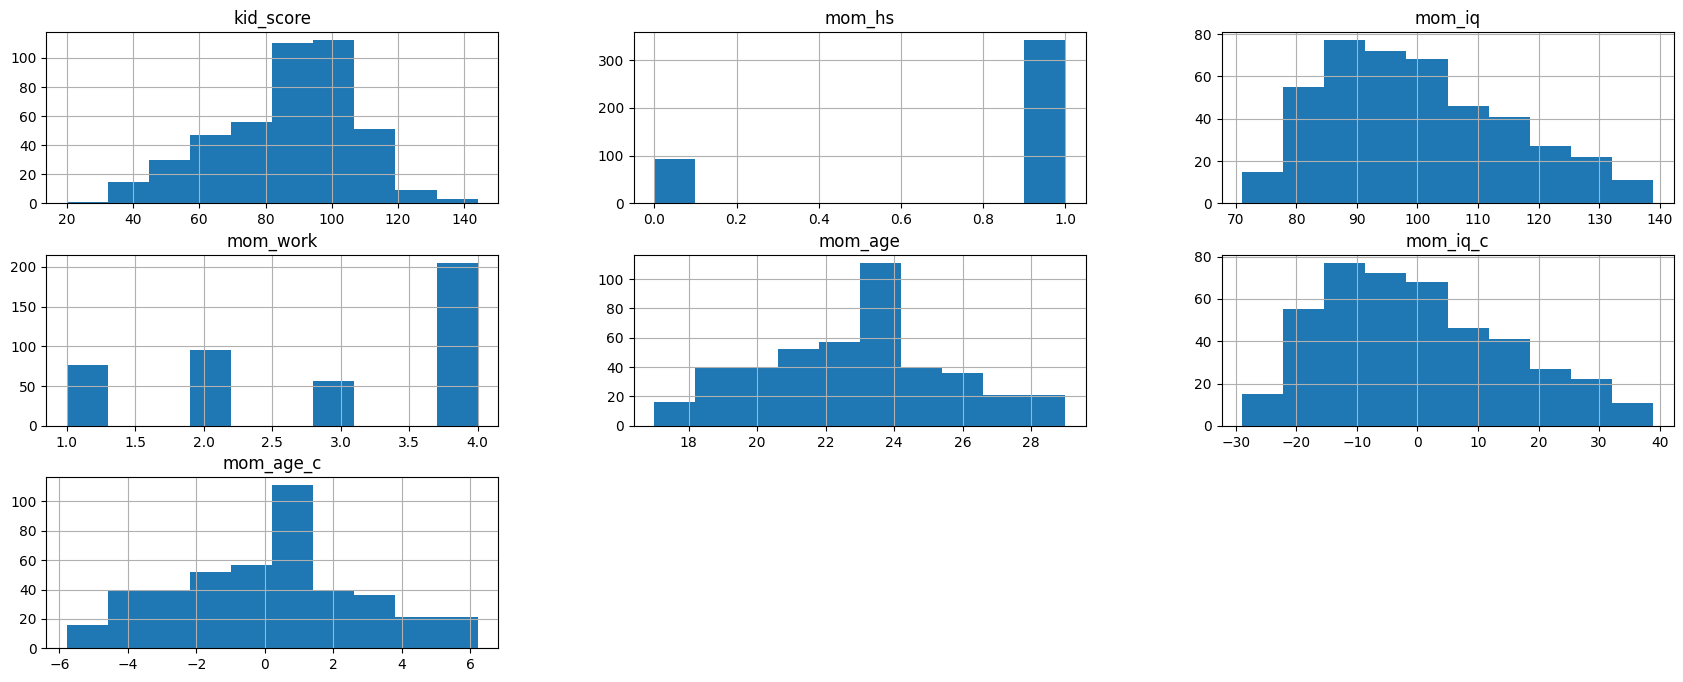

In [12]:
data.hist(figsize=(21,8))

In [13]:
fit1 = smf.ols('kid_score ~ 1 + mom_hs + mom_iq_c + mom_hs:mom_iq_c', data=data).fit()

print(fit1.summary())

                            OLS Regression Results                            
Dep. Variable:              kid_score   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     42.84
Date:                Tue, 04 Mar 2025   Prob (F-statistic):           3.07e-24
Time:                        15:01:40   Log-Likelihood:                -1867.5
No. Observations:                 434   AIC:                             3743.
Df Residuals:                     430   BIC:                             3759.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          85.4069      2.218     